In [238]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 1. Data Cleaning

In [6]:
# Checking for Null Values
df.isna().sum()

Category    0
Message     0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
# checking Duplicate Values
df.duplicated().sum()

415

In [12]:
df = df.drop_duplicates(keep="first")

In [14]:
df.duplicated().sum()

0

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [18]:
df["Category"] = encoder.fit_transform(df["Category"])

In [20]:
df.head(5)

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## 2. EDA

In [23]:
df.shape

(5157, 2)

In [25]:
df['Category'].value_counts()

Category
0    4516
1     641
Name: count, dtype: int64

By running value count in our target variable "df["Category"]" we can see there is a class imbalance in the dataset. We will keep this in mind moving forward.

In [29]:
# Checking character lenght, word count and sentence count to get a deep idea about the emails

# importing required packages 
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anikb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
df["number_of_characters"] = df["Message"].apply(len)
df["number_of_words"] = df["Message"].apply(lambda x: len(nltk.word_tokenize(x)))
df["number_of_sentences"] = df["Message"].apply(lambda x: len(nltk.sent_tokenize(x)))

In [31]:
df.head(5)

,Category,Message,number_of_characters,number_of_words,number_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
df.shape

(5157, 5)

In [33]:
# Checking descriptive statistics of the dataset
df.describe()

,Category,number_of_characters,number_of_words,number_of_sentences
count,5157.000000,5157.000000,5157.000000,5157.000000
mean,0.124297,79.104324,18.560403,1.969750
std,0.329952,58.384729,13.405970,1.455526
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,61.000000,15.000000,1.000000
75%,0.000000,118.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [34]:
# Checking descriptive statistics of the dataset where category is Ham or 0
df[df["Category"] == 0].describe()

,Category,number_of_characters,number_of_words,number_of_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.869796,17.267715,1.827724
std,0.0,56.710489,13.588065,1.394338
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,53.000000,13.000000,1.000000
75%,0.0,91.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [35]:
# Checking descriptive statistics of the dataset where category is Spam or 1
df[df["Category"] == 1].describe()

,Category,number_of_characters,number_of_words,number_of_sentences
count,641.0,641.000000,641.000000,641.000000
mean,1.0,137.118565,27.667707,2.970359
std,0.0,30.399707,7.103501,1.485575
min,1.0,7.000000,2.000000,1.000000
25%,1.0,130.000000,25.000000,2.000000
50%,1.0,148.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,223.000000,46.000000,9.000000


By checking descriptive statistics of the data we can see spam category emails overall length tense to quite smaller than the ham category emails.

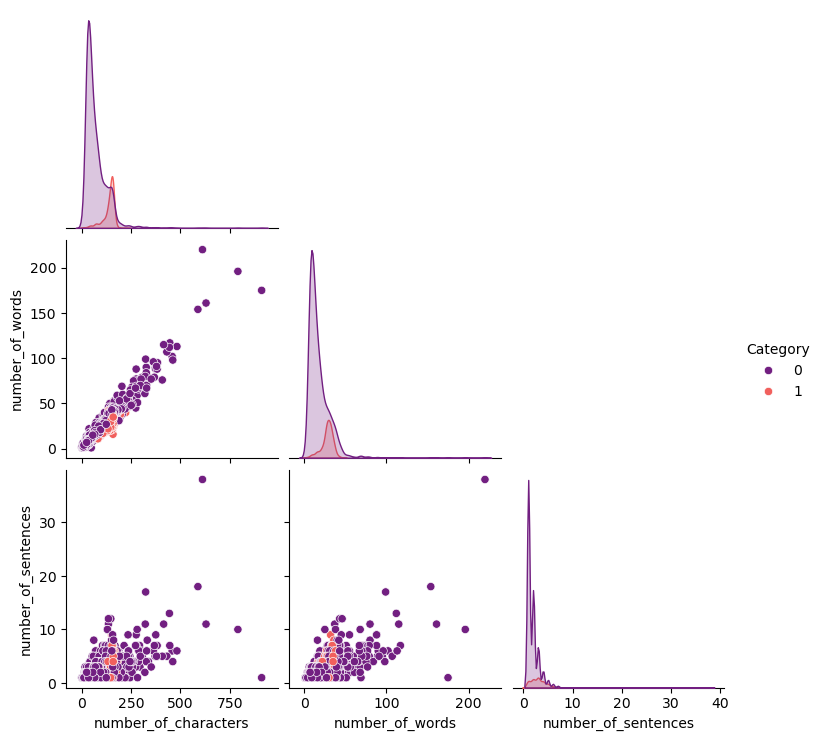

In [38]:
sns.pairplot(df,hue='Category',palette='magma',corner=True)

### Text Preprocessing

In [41]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anikb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [182]:
def transform_text(text):
    
    # Convert text to lowercase
    text_lowercase = text.lower()
    
    # Tokenize the text into individual words
    word_tokens = nltk.word_tokenize(text_lowercase)
    
    # Keep only alphanumeric words
    word_tokens = [word for word in word_tokens if word.isalnum()]
    
    # Remove stopwords and punctuation
    cleaned_text = [word for word in word_tokens if word not in stopwords.words('english') and word not in string.punctuation]

    # Stemming words
    stemmed_text = [ps.stem(word) for word in cleaned_text]
    
    # Join stemmed words back into a single string
    return " ".join(stemmed_text)

In [184]:
df["Processed_Text"] = df["Message"].apply(transform_text)

In [185]:
df.head(3)

,Category,Message,number_of_characters,number_of_words,number_of_sentences,Processed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...


In [188]:
from wordcloud import WordCloud

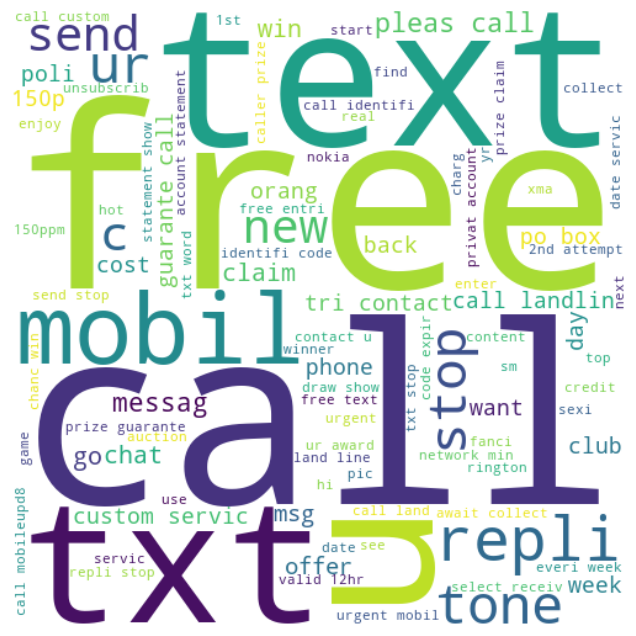

In [196]:
# Initialize the WordCloud object with desired parameters
wc = WordCloud(width=500, height=500, min_font_size=10, background_color="white")

# Filter for Category 1, convert 'Processed_Text' to strings, and concatenate into a single text
spam_text = df[df["Category"] == 1]["Processed_Text"].str.cat(sep=" ")

# Generate the word cloud
spam_wordcloud = wc.generate(spam_text)

# Display the generated word cloud
plt.figure(figsize=(8, 8))
plt.imshow(spam_wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.show()

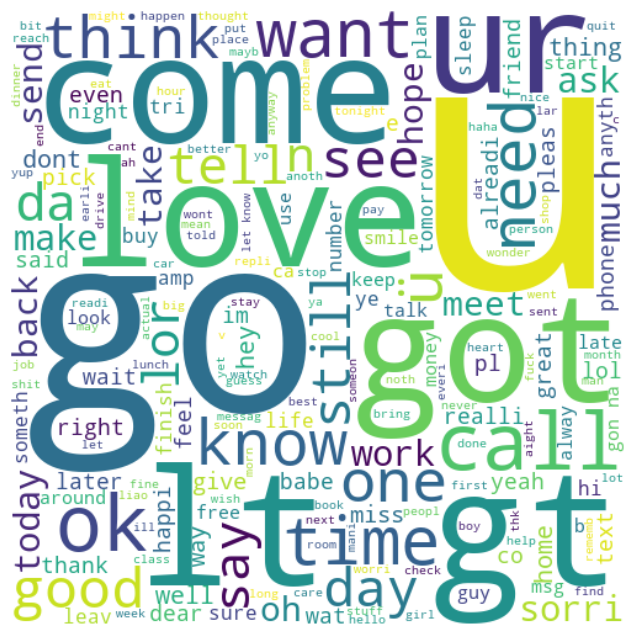

In [198]:
# Initialize the WordCloud object with desired parameters
wc = WordCloud(width=500, height=500, min_font_size=10, background_color="white")

# Filter for Category 0, convert 'Processed_Text' to strings, and concatenate into a single text
ham_text = df[df["Category"] == 0]["Processed_Text"].str.cat(sep=" ")

# Generate the word cloud
ham_wordcloud = wc.generate(ham_text)

# Display the generated word cloud
plt.figure(figsize=(8, 8))
plt.imshow(ham_wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.show()

C:\Users\anikb\AppData\Local\Temp\ipykernel_12856\1792801442.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=top_20_spam_words, palette='viridis')


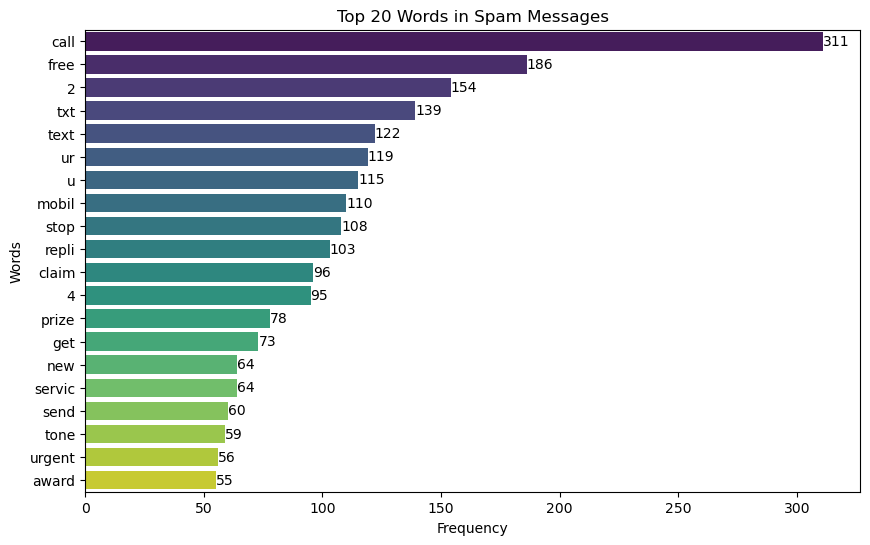

In [200]:
from collections import Counter

# Create a list of all words from spam messages
spam_corpus = []
for msg in df[df['Category'] == 1]['Processed_Text'].astype(str).tolist():
    for word in msg.split():
        spam_corpus.append(word)
        
# Count word occurrences and convert to DataFrame
top_20_spam_words = pd.DataFrame(Counter(spam_corpus).most_common(20), columns=['word', 'count'])

# Visualize using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=top_20_spam_words, palette='viridis')
plt.title('Top 20 Words in Spam Messages')
plt.xlabel('Frequency')
plt.ylabel('Words')

# Add data labels to each bar
for index, value in enumerate(top_20_spam_words['count']):
    plt.text(value, index, str(value), va='center')
    
plt.show()

## 3. Model Building

In [248]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from xgboost import XGBClassifier

In [250]:
# Define classifiers
cv = CountVectorizer()
tfidf = TfidfVectorizer()

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [252]:
clfs = {
    "SVC": svc,
    "KN": knc,
    "GNB": gnb,
    "MNB": mnb,
    "BNB": bnb,
    "DTC": dtc,
    "LRC": lrc,
    "RFC": rfc,
    "ABC": abc,
    "BC": bc,
    "ETC": etc,
    "GBDT": gbdt,
    "XGB": xgb
}

In [254]:
X_train, X_test, y_train, y_test = train_test_split(df.Processed_Text,df.Category, test_size=0.2, random_state=5)

In [262]:
# Apply CountVectorizer and convert to dense array
X_train_count = cv.fit_transform(X_train.values).toarray()
X_test_count = cv.transform(X_test.values).toarray()

# Apply TfidfVectorizer and convert to dense array
X_train_tfidf = tfidf.fit_transform(X_train.values).toarray()
X_test_tfidf = tfidf.transform(X_test.values).toarray()

In [258]:
# Total Unique words/Columns created
len(X_train_count.toarray()[1])

5947

In [268]:
# Function to evaluate classifiers
def evaluate_classifiers(X_train, X_test, y_train, y_test, vectorizer_name):
    results = []

    # Loop through classifiers
    for clf_name, clf in clfs.items():
        # Train the classifier
        clf.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = clf.predict(X_test)
        
        # Get classification report and filter metrics
        report = classification_report(y_test, y_pred, output_dict=True)
        
        # Extract accuracy, precision, and recall for each category
        accuracy = report['accuracy']
        precision_class_0 = report['0']['precision']
        recall_class_0 = report['0']['recall']
        precision_class_1 = report['1']['precision']
        recall_class_1 = report['1']['recall']
        
        # Append results, including vectorizer name in the model description
        results.append({
            'Model': f"{clf_name} ({vectorizer_name})",
            'Accuracy': accuracy,
            'Precision (Class 0)': precision_class_0,
            'Recall (Class 0)': recall_class_0,
            'Precision (Class 1)': precision_class_1,
            'Recall (Class 1)': recall_class_1
        })

    return pd.DataFrame(results)

In [270]:
# Evaluate classifiers using CountVectorizer
count_results = evaluate_classifiers(X_train_count, X_test_count, y_train, y_test, vectorizer_name="CountVectorizer")

C:\Users\anikb\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [274]:
# Evaluate classifiers using TfidfVectorizer
tfidf_results = evaluate_classifiers(X_train_tfidf, X_test_tfidf, y_train, y_test, vectorizer_name="TfidfVectorizer")

C:\Users\anikb\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [302]:
# Concatenate results
final_results = pd.concat([count_results, tfidf_results], axis=0).reset_index(drop=True)

In [304]:
# Sort final_results by 'Accuracy' first, then by 'Precision (Class 1)', in descending order
final_results_sorted = final_results.sort_values(["Accuracy", "Precision (Class 1)"], ascending=False)
final_results_sorted

,Model,Accuracy,Precision (Class 0),Recall (Class 0),Precision (Class 1),Recall (Class 1)
3,MNB (CountVectorizer),0.981589,0.983678,0.995595,0.964602,0.879032
13,SVC (TfidfVectorizer),0.979651,0.979459,0.997797,0.981308,0.846774
23,ETC (TfidfVectorizer),0.974806,0.972163,1.000000,1.000000,0.790323
7,RFC (CountVectorizer),0.971899,0.969050,1.000000,1.000000,0.766129
10,ETC (CountVectorizer),0.971899,0.970053,0.998899,0.989691,0.774194
20,RFC (TfidfVectorizer),0.969961,0.966986,1.000000,1.000000,0.750000
12,XGB (CountVectorizer),0.969961,0.975081,0.991189,0.926606,0.814516
9,BC (CountVectorizer),0.968992,0.971983,0.993392,0.942308,0.790323
21,ABC (TfidfVectorizer),0.968023,0.970936,0.993392,0.941748,0.782258
4,BNB (CountVectorizer),0.967054,0.963907,1.000000,1.000000,0.725806


From the above result we can see the top 3 models thats has high accuracy and maximum spam identify precision are 
1. MNB (CountVectorizer)
2. SVC (TfidfVectorizer)
3. ETC (TfidfVectorizer)

## 4. Improving Model Performance

In [296]:
# Adjusting tfidf vectorizer parameter. Setting it to max_features = 3000
tfidf = TfidfVectorizer(max_features=3000)

In [306]:
# Evaluate classifiers using TfidfVectorizer with Max Feature 3000
tfidf_MaxF3000_results = evaluate_classifiers(X_train_tfidf, X_test_tfidf, y_train, y_test, vectorizer_name="TfidfVectorizer_MaxF_3000")

C:\Users\anikb\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [310]:
# Concatenate results
final_results = pd.concat([count_results, tfidf_results, tfidf_MaxF3000_results], axis=0).reset_index(drop=True)

In [312]:
# Sort final_results by 'Accuracy' first, then by 'Precision (Class 1)', in descending order
final_results_sorted = final_results.sort_values(["Accuracy", "Precision (Class 1)"], ascending=False)
final_results_sorted

,Model,Accuracy,Precision (Class 0),Recall (Class 0),Precision (Class 1),Recall (Class 1)
3,MNB (CountVectorizer),0.981589,0.983678,0.995595,0.964602,0.879032
13,SVC (TfidfVectorizer),0.979651,0.979459,0.997797,0.981308,0.846774
26,SVC (TfidfVectorizer_MaxF_3000),0.979651,0.979459,0.997797,0.981308,0.846774
23,ETC (TfidfVectorizer),0.974806,0.972163,1.000000,1.000000,0.790323
36,ETC (TfidfVectorizer_MaxF_3000),0.974806,0.972163,1.000000,1.000000,0.790323
7,RFC (CountVectorizer),0.971899,0.969050,1.000000,1.000000,0.766129
10,ETC (CountVectorizer),0.971899,0.970053,0.998899,0.989691,0.774194
20,RFC (TfidfVectorizer),0.969961,0.966986,1.000000,1.000000,0.750000
33,RFC (TfidfVectorizer_MaxF_3000),0.969961,0.966986,1.000000,1.000000,0.750000
12,XGB (CountVectorizer),0.969961,0.975081,0.991189,0.926606,0.814516


By introducing max feature in tfidf we tried to improve the model results but by looking at the above result we see no differences. Yet the top 3 models are
1. MNB (CountVectorizer)
2. SVC (TfidfVectorizer)
3. ETC (TfidfVectorizer)

In [326]:
from sklearn.ensemble import VotingClassifier

svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [337]:
# Creating voting classifier with top 3 models & Using Count Vectorizer data
voting =VotingClassifier(estimators=[('svc',svc),('mnb',mnb),('etc',etc)],voting='soft')

In [341]:
voting.fit(X_train_count,y_train)

VotingClassifier(estimators=[('svc',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('mnb', MultinomialNB()),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [343]:
y_pred = voting.predict(X_test_count)

In [355]:
voting_report = classification_report(y_test, y_pred, digits= 4)

In [357]:
print(voting_report)

              precision    recall  f1-score   support

           0     0.9827    1.0000    0.9913       908
           1     1.0000    0.8710    0.9310       124

    accuracy                         0.9845      1032
   macro avg     0.9913    0.9355    0.9612      1032
weighted avg     0.9848    0.9845    0.9840      1032



Using a voting classifier with count vectorizer data, we can see a slight improvement in the result, especially in Spam precision.

Now we will use the votingclassifier with tfidfvectorizer data to check for any improvement.

In [361]:
voting.fit(X_train_tfidf,y_train)

VotingClassifier(estimators=[('svc',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('mnb', MultinomialNB()),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [363]:
y_pred = voting.predict(X_test_tfidf)

In [365]:
voting_report = classification_report(y_test, y_pred, digits= 4)
print(voting_report)

              precision    recall  f1-score   support

           0     0.9774    1.0000    0.9886       908
           1     1.0000    0.8306    0.9075       124

    accuracy                         0.9797      1032
   macro avg     0.9887    0.9153    0.9480      1032
weighted avg     0.9801    0.9797    0.9788      1032



Using a voting classifier with count vectorizer data, we can see a decrease in improvement in the results. So we will stick with the previous result.

Further, we will try stratified k-fold cross-validation to improve the result.

In [374]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_val_score

# Define individual classifiers
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

# Create a VotingClassifier with soft voting
voting = VotingClassifier(estimators=[('svc', svc), ('mnb', mnb), ('etc', etc)], voting='soft')

# Set up Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

# Perform Stratified K-Fold cross-validation
cv_scores = cross_val_score(voting, X_train_count, y_train, cv=skf, scoring='accuracy', n_jobs=-1)
print("Cross-validation accuracy scores:", cv_scores)
print("Mean cross-validation accuracy:", np.mean(cv_scores))

# Fit the model on the entire training set
voting.fit(X_train_count, y_train)

# Predict on the test set and generate a classification report
y_pred = voting.predict(X_test_count)
report = classification_report(y_test, y_pred, digits=4)
print("Classification Report for the Voting Classifier:\n", report)

Cross-validation accuracy scores: [0.9769697  0.97454545 0.98424242 0.9830303  0.98545455]
Mean cross-validation accuracy: 0.9808484848484849
Classification Report for the Voting Classifier:
               precision    recall  f1-score   support

           0     0.9827    1.0000    0.9913       908
           1     1.0000    0.8710    0.9310       124

    accuracy                         0.9845      1032
   macro avg     0.9913    0.9355    0.9612      1032
weighted avg     0.9848    0.9845    0.9840      1032



By applying Stratified K fold cross validation we can see some improvement in the model.

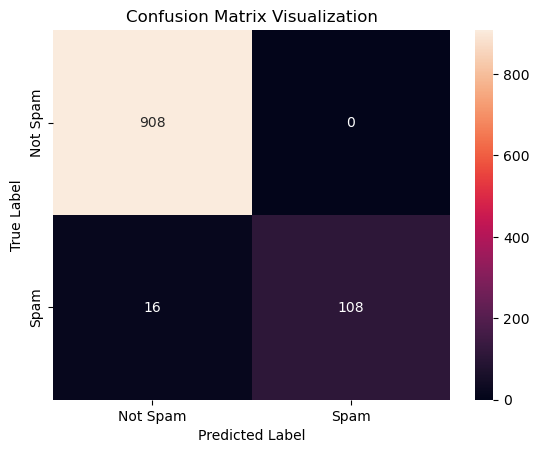

In [385]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Visualization')
plt.show()